# Investigating a No-Show medical appointments for public hospitals in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is a collection of some 110K medical appointments of patients in Brazil. The records include different characteristics of patients, along with a no-show record, which here is most important to us. The various given factors will be used to relate the reason for no-shows. Factors such as age, day on which appointment falls and wait time!


### Importing the libraries we'll be using 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, the data will be loaded from CSV file and studied for any inconsistency. The data will then be cleaned for further use
### General Properties

In [2]:
# loading the csv file and checking the datatypes of the columns
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# df.head(5) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> It can be seen that few column names are not correct, also datatype for few columns aren't accurate

### Renaming the column names first for easy use/understanding

In [3]:
# renaming the column names for easy use 

df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.rename(columns= {'hipertension': 'hypertension', 'handcap': 'handicap'}, inplace=True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

> The name of columns were changed also hyphens were changed to underscores for better use

### General descriptive summary of the dataset

In [4]:
df.describe()

,patientid,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> It can be seen that patient ID is reflecting as float value, which will be changed to INT in next section. Also, the minimum age is -1, which does not make sense. This will be left out as well.

### Checking datatypes of the columns which are to be changed

In [5]:
# Datatypes of the columns
print(df['patientid'].dtype)
print(df['scheduledday'].dtype)
print(df['appointmentday'].dtype)

float64
object
object


> The patienttid will be changed to INT and the date fields to datetime type

## Data Cleaning

> In this section, the datatypes for the incorrect columns will be corrected. Also, columns with datatype as boolean will be converted to 0,1. Also, couple of new columns will be derived based on the values from other columns.

### Removing age outliers!



> As discussed in the above section, the minimun age -1. Let's have a look at a histogram for age!

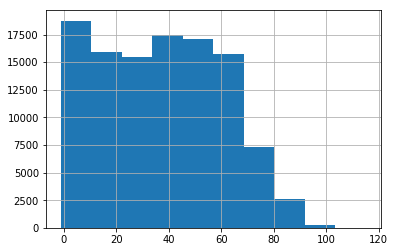

In [6]:
# plotting a histogram for age of the patients
df['age'].hist()

> It can be seen that there are outliers which will be removed.

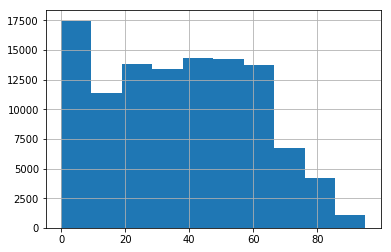

In [7]:
# Removing the age outliers and -1 year to include patients with age between 0-95 years
df = df[(df.age >= 0) & (df.age <= 95)]
df['age'].hist()

> Now our histogram for age looks pretty!

### Converting the columns with boolean value to 0,1

In [8]:
#
df['no_show'].replace({'No':0,'Yes':1},inplace=True)

### Changing the datatypes of the columns

> In this next cell, the datatypes of the columns such as patientid, scheduledday, apppointmentday will be changed.

In [9]:
# First let's strip away T and Z from day fields
# df['scheduledday'] = df['scheduledday'].str.replace('T', ' ')
# df['scheduledday'] = df['scheduledday'].str.replace('Z', '')

# Changing the columns to datetime field 

df.scheduledday = df.scheduledday.apply(np.datetime64)
df.appointmentday   = df.appointmentday.apply(np.datetime64)

# Changing the datatype of patientid to int

df['patientid'] = df['patientid'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110480 non-null int64
appointmentid     110480 non-null int64
gender            110480 non-null object
scheduledday      110480 non-null datetime64[ns]
appointmentday    110480 non-null datetime64[ns]
age               110480 non-null int64
neighbourhood     110480 non-null object
scholarship       110480 non-null int64
hypertension      110480 non-null int64
diabetes          110480 non-null int64
alcoholism        110480 non-null int64
handicap          110480 non-null int64
sms_received      110480 non-null int64
no_show           110480 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 12.6+ MB


> The datatypes for the columns are now changed to appropriate column names!

<a id='eda'></a>
## Exploratory Data Analysis

> In this section, the correlation between the no-shows and other factors will be determined!

### How did the appointment day affect the no-show?
> Did day of the week matter to appointee? In the next cell, day of the week from appointment day will be extracted to answer this question!

In [33]:
# First let's figure out the appointment day falls in which day of week
# getting the day of week from day of appointment

df['day_of_week'] = df['appointmentday'].dt.weekday

# creating absent/present based on False(0), True(1) values of no_show

present = df['no_show'] == 0 
absent = df['no_show'] == 1


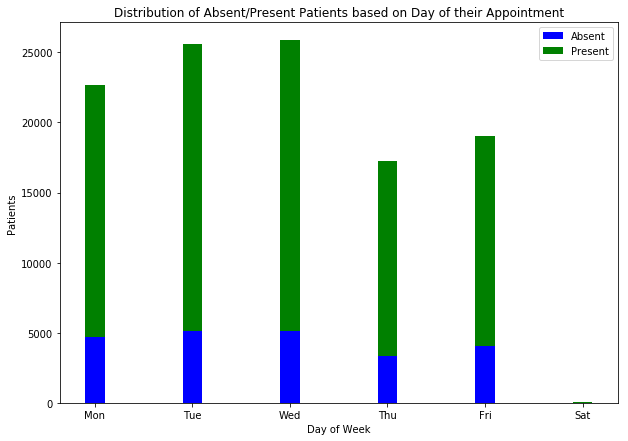

In [35]:
absent_patient_count  = pd.value_counts(df.day_of_week[absent]).sort_index()
present_patient_count = pd.value_counts(df.day_of_week[present]).sort_index()
X = np.arange(len(absent_patient_count))
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
ax.bar(X, absent_patient_count, width=0.2, color='b', align='center')
ax.bar(X, present_patient_count, width=0.2, bottom=absent_patient_count, color='g', align='center')
ax.legend(('Absent','Present'))
plt.xticks(X, ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
ax.set_title("Distribution of Absent/Present Patients based on Day of their Appointment")
ax.set_xlabel("Day of Week")
ax.set_ylabel("Patients")
plt.show()

**Answer**
> It can be seen that patients missed their appointment most when it fell on Monday, Tuesday or Wednesday. Also, most number of appointments fell on those days! 

### Did the wait time between Schedule Day and Appointment day affected no-shows?

> Did the time difference between making an appointment and day of appointment affect no-shows? In the next cell the time difference between Schedule Day and Appointment will be calculated and will be categorized into groups for visualization.

In [17]:
# Create a new column which is a result of subtraction of appointmentday from scheduleday

df['leadtime'] = df["appointmentday"].sub(df["scheduledday"], axis=0)
df["leadtime"] = (df["leadtime"] / np.timedelta64(1, 'D')).abs()

# df['leadtime'].dtype
# df['leadtime'] = df.leadtime.astype(int)
# create a new column using pandas cut!

df['wait_time'] = pd.cut(df.leadtime, [0, 3, 7, 25, 40, 200], labels=['Same Day', '3-7 Days', '8-25 Days', '25-40 Days', '40+ Days'])


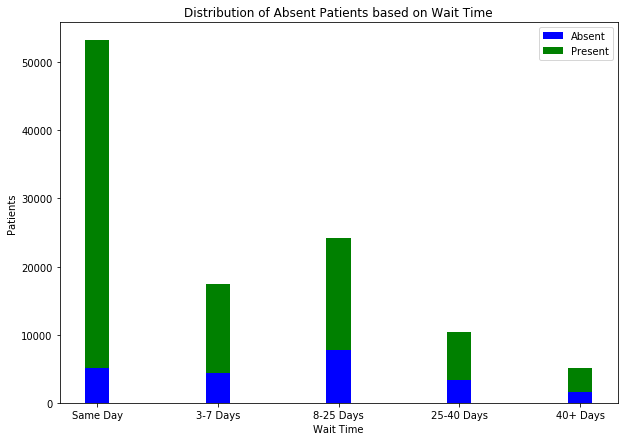

In [28]:
absent_patient_count  = pd.value_counts(df.wait_time[absent]).sort_index()
present_patient_count = pd.value_counts(df.wait_time[present]).sort_index()
X = np.arange(len(absent_patient_count))
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
ax.bar(X, absent_patient_count, width=0.2, color='b', align='center')
ax.bar(X, present_patient_count, width=0.2, bottom=absent_patient_count, color='g', align='center')
ax.legend(('Absent','Present'))
plt.xticks(X, ['Same Day', '3-7 Days', '8-25 Days', '25-40 Days', '40+ Days'])
ax.set_title("Distribution of Absent Patients based on Wait Time")
ax.set_xlabel("Wait Time")
ax.set_ylabel("Patients")
plt.show()

**Answer**
> It can be seen from the above graph that patients missed their appointments most when it was scheduled somewhere between 8-25 days after making a request (schedule day). Also, most number of appointments were scheduled for the same day.

### Which age groups had the most number of no-shows?

> Did the age of patients affect no-shows? The ages of the patients will be divided into groups and the question will be answered with help of a visualization!

In [31]:
# making the age groups based on the ages of the patients using pandas cut! 

df['age_group'] = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90", "91-100"])

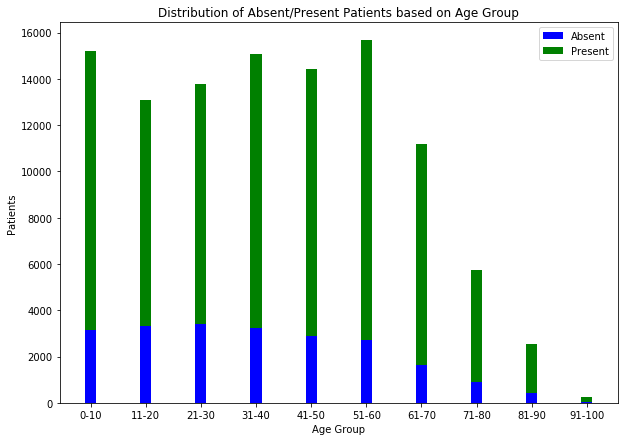

In [48]:
labels=["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90", "91-100"]
absent_patient_count  = pd.value_counts(df.age_group[absent]).sort_index()
present_patient_count = pd.value_counts(df.age_group[present]).sort_index()
X = np.arange(len(absent_patient_count))
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
ax.bar(X, absent_patient_count, width=0.2, color='b', align='center')
ax.bar(X, present_patient_count, width=0.2, bottom=absent_patient_count, color='g', align='center')
ax.legend(('Absent','Present'))
plt.xticks(X, labels)
ax.set_title("Distribution of Absent/Present Patients based on Age Group")
ax.set_xlabel("Age Group")
ax.set_ylabel("Patients")
plt.show()

**Answer**
> It turns out that the patients which had their age between 11-20, 21-30 and 31-40 years contributed to the most no-shows in 2016. Although, most of the patients fell in 51-60 year old age group.

### Did the special conditions affect no-shows?

> The special attributes assocaited with each patients have also been provided in the dataset. These are chronic conditions like diabetes, hypertension, whether handicap (upto 4 different levels), etc. Let's try to figure out how these conditions affected no-shows! Here people suffering from either of these 4 conditions are categorized as speical and vice-versa: non-special.

In [36]:
# based on the hypertension, diabetes, diabetes and handicap, let's create a new column
# this new column is just another attribute of Patient, assigning yes or no to special_condition

df["special_condition"] = (df.hypertension == 1) | (df.diabetes == 1) | (df.alcoholism == 1) | (df.handicap > 0)

# replacing the Boolean False and True to 0, 1
df['special_condition'].replace({False:0,True:1},inplace=True)

# creating non_special and special bases on special_condition
non_special = df['special_condition'] == 0 
special = df['special_condition'] == 1

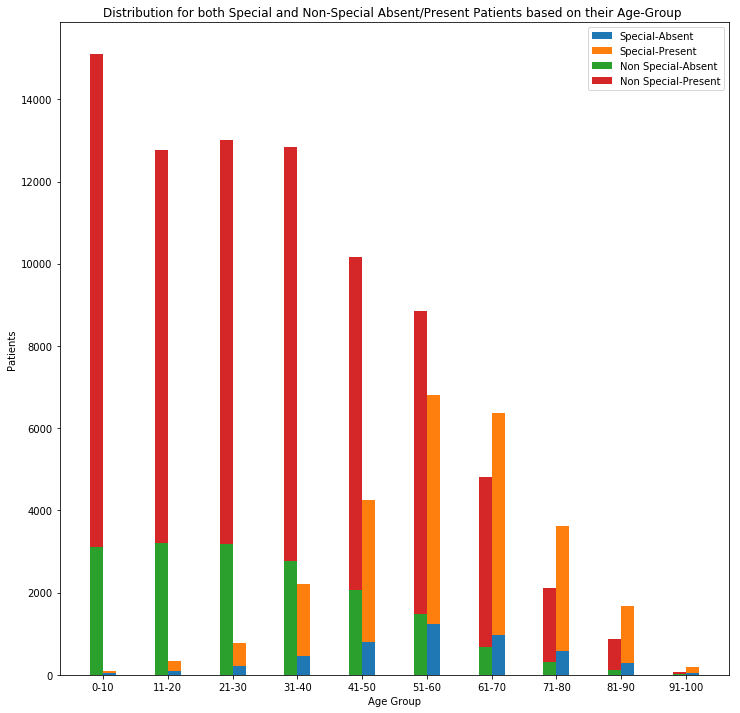

In [47]:
# plotting a bar graph for both special and non-special absent patients based on their age-group!


special_patient_count_pre  = pd.value_counts(df.age_group[present][special]).sort_index()
special_patient_count_abs  = pd.value_counts(df.age_group[absent][special]).sort_index()
non_special_patient_count_pre = pd.value_counts(df.age_group[present][non_special]).sort_index()
non_special_patient_count_abs  = pd.value_counts(df.age_group[absent][non_special]).sort_index()
X = np.arange(len(special_patient_count_pre))
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111)
ax.bar(X, special_patient_count_abs, width=0.2, align='center')
ax.bar(X, special_patient_count_pre, width=0.2, bottom=special_patient_count_abs, align='center')
ax.bar(X-0.2, non_special_patient_count_abs, width=0.2, align='center')
ax.bar(X-0.2, non_special_patient_count_pre, width=0.2, bottom=non_special_patient_count_abs, align='center')
ax.legend(('Special-Absent','Special-Present', 'Non Special-Absent', 'Non Special-Present'))
plt.xticks(X-0.1, ["0-10","11-20","21-30","31-40","41-50","51-60","61-70","71-80","81-90", "91-100"])
ax.set_title("Distribution for both Special and Non-Special Absent/Present Patients based on their Age-Group ")
ax.set_xlabel("Age Group")
ax.set_ylabel("Patients")
plt.show()

**Answer**
> It turns out that most number of no-shows were from patients between 11-20 and 21-30 years and suffering from none of the special conditions (hypertension, diabetes, diabetes and handicap). 

> The most number of no-shows for the patients which did suffer from either or more than one condition of hypertension, diabetes, diabetes and handicap were from the age-group 51-60 followed by 61-70.

<a id='conclusions'></a>
## Conclusions

-  If appointments falls on Tuesday, Wednesday - the paitents missed their appointments. Also, most number of appointments were scheduled for those days.
-  People of 11-20, 21-30 and 31-40 age groups are more likely to miss out on appointments. Most number of the patients fell in 51-60 year old age group.
-  Most patients missed out on their appointments if wait time for them was 8-25 days. Most number of appointments were scheduled for same day.
-  Teens and people in their 20s missed out on their appointments if they're not suffering from any medical conditions. Most people missed out on appointments were people who belonged to 51-60 age group and had one or many medical conditions.

### Limitations

-  Outliers in data (age).
-  The dataset explored here is a subset of original one on Kaggle (300k records). The selection here could've affected 
   our analysis.

##### Sources uses:

-  changing sizes with subplots - https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots
-  getting time difference - https://stackoverflow.com/questions/16103238/pandas-timedelta-in-days